In [93]:
import sys
import plotly.graph_objects as go
from datetime import datetime, timedelta
sys.path.insert(1, '/Users/georgegarforth/code/trading')
sys.path.insert(1, '/Users/georgegarforth/code/trading/src')

from clients.oanda import get_latest_candle_data, get_open_trades, close_trade, place_order, get_trades
from services.visualisation import plot_candlestick_chart

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
CURRENCY_PAIRS = ['GBP_USD', 'USD_JPY', 'GBP_USD', 'USD_CHF', 'AUD_USD', 'USD_CAD', 'NZD_USD']        

In [95]:
def get_datetime_from_oanda_datetime_str(datetime_str):
    return datetime.strptime(last_two_candles[0].time.split('.')[0], '%Y-%m-%dT%H:%M:%S')

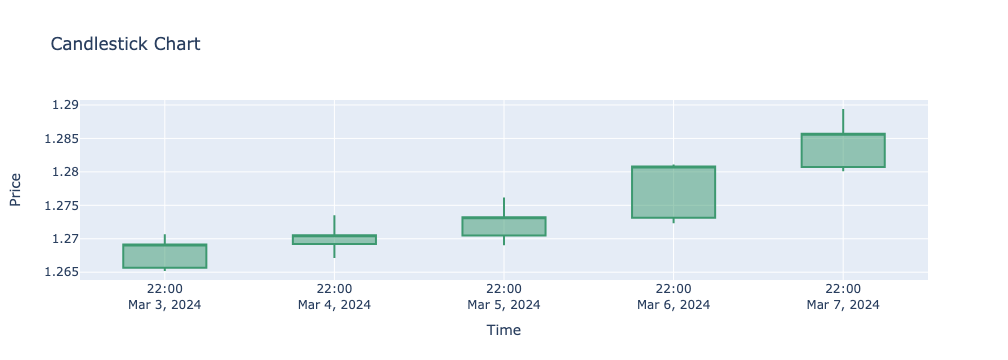

In [96]:
# show candles

instrument = 'GBP_USD'
granularity = 'D'
count = 5
candles = get_latest_candle_data(instrument, granularity, count)
fig = plot_candlestick_chart(candles)
fig.show()

In [97]:
# submit order

order_data = {
    "order": {
        "instrument": "GBP_USD",
        "units": "100",
        "type": "MARKET",
        "positionFill": "DEFAULT"
    }
}
place_order(order_data)

{'orderCreateTransaction': {'id': '126',
  'accountID': '101-004-27995522-001',
  'userID': 27995522,
  'batchID': '126',
  'requestID': '61215381121805403',
  'time': '2024-03-09T11:04:58.862106835Z',
  'type': 'MARKET_ORDER',
  'instrument': 'GBP_USD',
  'units': '100',
  'timeInForce': 'FOK',
  'positionFill': 'DEFAULT',
  'reason': 'CLIENT_ORDER'},
 'orderCancelTransaction': {'id': '127',
  'accountID': '101-004-27995522-001',
  'userID': 27995522,
  'batchID': '126',
  'requestID': '61215381121805403',
  'time': '2024-03-09T11:04:58.862106835Z',
  'type': 'ORDER_CANCEL',
  'orderID': '126',
  'reason': 'MARKET_HALTED'},
 'relatedTransactionIDs': ['126', '127'],
 'lastTransactionID': '127'}

In [98]:
# close trades

open_trades = get_open_trades()
#for open_trade in open_trades['trades']:
#    close_trade(open_trade['id'])

In [92]:
# 1 Look for currency pairs which increased in previous 24 hours

trades = get_trades()['trades']
for currency_pair in CURRENCY_PAIRS:
    currency_trades = [c for c in trades if c['instrument'] == currency_pair]
    assert len(currency_trades) <= 1, "Should only ever have a single trade for each currency pair"

    latest_complete_candle = get_latest_candle_data(instrument=currency_pair, granularity='D', count=2)[0]
    candle_end = get_datetime_from_oanda_datetime_str(latest_complete_candle.time)
    open = float(latest_complete_candle.mid.o)
    close = float(latest_complete_candle.mid.c)
    price_increase = round(close - open, 3)

    if price_increase > 0:
        print(f"Value of {currency_pair} is {price_increase} greater at {candle_end} than previous day. If trade doesn't already exist, would create trade.")
    else:
        print(f"Value of {currency_pair} is {-price_increase} lower at {candle_end} than previous day. If trade exists, would close trade.")
        

Value of GBP_USD is 0.008 greater at 2024-03-06 22:00:00 than previous day. If trade doesn't already exist, would create trade.
Value of USD_JPY is 1.34 lower at 2024-03-06 22:00:00 than previous day. If trade exists, would close trade.
Value of GBP_USD is 0.008 greater at 2024-03-06 22:00:00 than previous day. If trade doesn't already exist, would create trade.
Value of USD_CHF is 0.005 lower at 2024-03-06 22:00:00 than previous day. If trade exists, would close trade.
Value of AUD_USD is 0.006 greater at 2024-03-06 22:00:00 than previous day. If trade doesn't already exist, would create trade.
Value of USD_CAD is 0.006 lower at 2024-03-06 22:00:00 than previous day. If trade exists, would close trade.
Value of NZD_USD is 0.004 greater at 2024-03-06 22:00:00 than previous day. If trade doesn't already exist, would create trade.
